#Importação de biblioteca e dados

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, log_loss, f1_score, recall_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import pickle
import numpy as np
import ast


#importa os dados, deixando apenas a colunas necessárias
dados = pd.read_csv('/content/df_novo.csv')
dados = dados[['texto', 'sentimento']]
dados.head()

#exporta a nova tabela para um arquivo CSV
dados.to_csv('/content/novos_dados.csv', index=False)

A base de dados utilizada já passou pelos primeiros processos de PLN (remoção de stop words, substituição de gírias e, em destaque, a lematização). Essa é a mesma base de dados lematizada que foi desenvolvida na Sprint 3 e utilizada no modelo anterior.<br> Link para baixa-la: https://drive.google.com/file/d/1UVwHSONzwiCGcepvooBByLrF2p-WOQTa/view?usp=sharing

#Divisão dos dados em conjunto de treinamento e teste

In [21]:
#dividi os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(dados["texto"], dados["sentimento"], test_size=0.2, random_state=42)

#TF-IDF e modelo de classificação

O TF-IDF (Term Frequency-Inverse Document Frequency) é uma medida estatística que permite avaliar a importância de uma palavra em um documento. Essa técnica foi escolhida por sua capacidade de destacar palavras-chave relevantes e reduz o peso de palavras comuns, ajudando a identificar a relevância de um termo em relação ao contexto específico de um documento. 

A Regressão Logística é um algoritmo de aprendizado de máquina que é amplamente utilizado para tarefas de classificação binária. Ele modela a relação entre variáveis independentes e a probabilidade de uma resposta pertencer a uma determinada classe. Sua escolha foi feita especialmente pela sua capacidade de lidar com dados categóricos (como é o caso da base de dados trabalhada).

A combinação de TF-IDF com Regressão Logística aproveita as vantagens de ambos os métodos. O TF-IDF fornece uma representação ponderada das palavras em um documento, enquanto a Regressão Logística modela a relação entre essas palavras e a probabilidade de classificação. Essa combinação é comum em processos de análise de sentimentos como esse.




In [22]:
#cria pipeline com TF-IDF e modelo de classificação
pipeline = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("model", LogisticRegression(max_iter=1000))  # Aumentamos o número máximo de iterações
])

#Treinamento do modelo 

In [23]:
#treina o modelo usando os dados de treinamento
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('model', LogisticRegression(max_iter=1000))])

In [24]:
#obtém os resultados
results = pipeline.predict(X_test)

#cria um DataFrame com os resultados
df_results = pd.DataFrame({'Predição': results})

#exporta o DataFrame para um arquivo CSV
df_results.to_csv('resultados.csv', index=False)

#Avaliação do Modelo

In [25]:
#avalia o modelo usando os dados de teste
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

#calcular a perda (loss)
y_pred_prob = pipeline.predict_proba(X_test)
loss = log_loss(y_test, y_pred_prob)

#aplicação da matriz de confusão
confusion_mat = confusion_matrix(y_test, y_pred)

# Calcular F1-score
f1_micro = f1_score(y_test, y_pred, average='micro')
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_weighted = f1_score(y_test, y_pred, average='weighted')

# Calcular recall
recall_micro = recall_score(y_test, y_pred, average='micro')
recall_macro = recall_score(y_test, y_pred, average='macro')
recall_weighted = recall_score(y_test, y_pred, average='weighted')

#precisão nos dados de treinamento
train_accuracy = pipeline.score(X_train, y_train)

#precisão nos dados de teste
test_accuracy = accuracy_score(y_test, y_pred)

#Resultados

In [26]:
#imprime os resultados
print("Acurácia:", accuracy)
print("Perda:", loss)
print("Matriz de Confusão:")
print(confusion_mat)
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))
print("F1-score (micro):", f1_micro)
print("F1-score (macro):", f1_macro)
print("F1-score (weighted):", f1_weighted)
print("Recall (micro):", recall_micro)
print("Recall (macro):", recall_macro)
print("Recall (weighted):", recall_weighted)

print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)

Acurácia: 0.7560475604756047
Perda: 0.6013690684727722
Matriz de Confusão:
[[271 152  56]
 [ 49 871 127]
 [ 35 176 702]]
Relatório de Classificação:
              precision    recall  f1-score   support

          -1       0.76      0.57      0.65       479
           0       0.73      0.83      0.78      1047
           1       0.79      0.77      0.78       913

    accuracy                           0.76      2439
   macro avg       0.76      0.72      0.74      2439
weighted avg       0.76      0.76      0.75      2439

F1-score (micro): 0.7560475604756047
F1-score (macro): 0.7354495983967934
F1-score (weighted): 0.7528819317613822
Recall (micro): 0.7560475604756047
Recall (macro): 0.7221854765326053
Recall (weighted): 0.7560475604756047
Train accuracy: 0.866413778962477
Test accuracy: 0.7560475604756047


#Exporta o modelo (pickle)

In [27]:
#exporta o modelo treinado usando a biblioteca pickle
with open("modelo.pkl", "wb") as f:
    pickle.dump(pipeline, f)

#Função para aplicação do Modelo

In [28]:
#função para avaliar um novo comentário
def avaliar_comentario(comentario):
    with open("modelo.pkl", "rb") as f:
        modelo = pickle.load(f)
    resultado = modelo.predict([comentario])
    return resultado

#Aplicações individuais do modelo

In [29]:
#exemplo de uso da função
novo_comentario = "Esse produto é incrível!"
sentimento = avaliar_comentario(novo_comentario)
print("Sentimento:", sentimento)

Sentimento: [1]


In [30]:
#exemplo de uso da função
novo_comentario = "Esse banco é ruim"
sentimento = avaliar_comentario(novo_comentario)
print("Sentimento:", sentimento)

Sentimento: [-1]


In [31]:
#exemplo de uso da função
novo_comentario = "banco golpista ladrão"
sentimento = avaliar_comentario(novo_comentario)
print("Sentimento:", sentimento)

Sentimento: [-1]


In [32]:
#exemplo de uso da função
novo_comentario = "eu sou roubado e não fazem nada"
sentimento = avaliar_comentario(novo_comentario)
print("Sentimento:", sentimento)

Sentimento: [-1]


In [33]:
#exemplo de uso da função
novo_comentario = "amo demais o btg!"
sentimento = avaliar_comentario(novo_comentario)
print("Sentimento:", sentimento)

Sentimento: [1]


In [34]:
#exemplo de uso da função
novo_comentario = "serviço ok"
sentimento = avaliar_comentario(novo_comentario)
print("Sentimento:", sentimento)

Sentimento: [0]


In [40]:
#exemplo de uso da função
novo_comentario = "Super atenciosos! Estão de parabéns!"
sentimento = avaliar_comentario(novo_comentario)
print("Sentimento:", sentimento)

Sentimento: [1]


#Gráficos e Análise

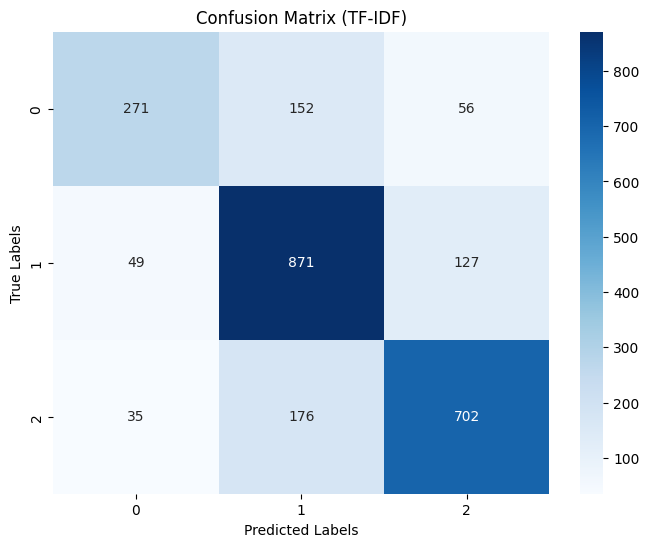

In [36]:
import seaborn as sns

# Gráfico da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (TF-IDF)")
plt.show()


A partir da matriz de confusão é possível perceber que o modelo tem mais dificuldades ao avaliar comentários neutros e uma facilidade para avaliar positivos e, em segundo lugar, negativos.

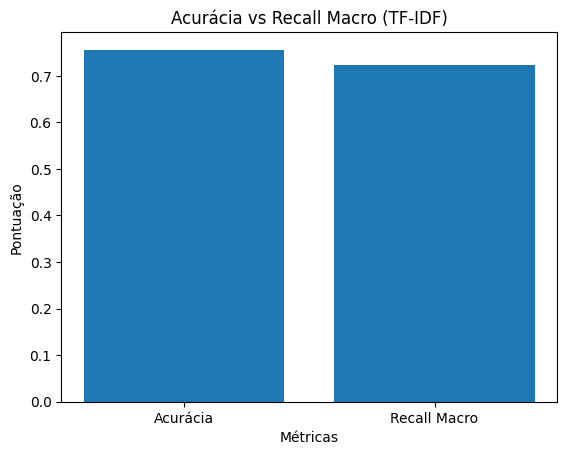

In [37]:
# Calcular acurácia e recall macro
acuracia = accuracy_score(y_test, y_pred)
recall_macro = recall_score(y_test, y_pred, average='macro')

# Criar o gráfico de barras
labels = ['Acurácia', 'Recall Macro']
valores = [acuracia, recall_macro]

plt.bar(labels, valores)
plt.xlabel('Métricas')
plt.ylabel('Pontuação')
plt.title('Acurácia vs Recall Macro (TF-IDF)')

plt.show()

Com base nos resultados obtidos, podemos concluir que o modelo apresenta um desempenho equilibrado e consistente, com valores de acurácia e recall macro próximos, em torno de 0,7. Isso indica que o modelo é capaz de fazer previsões precisas na maioria das amostras de teste, classificando corretamente tanto as instâncias positivas quanto as negativas.

Além disso, a similaridade entre a acurácia e o recall macro sugere que o modelo não está enviesado para uma classe específica e está tratando ambas as classes de forma equilibrada.



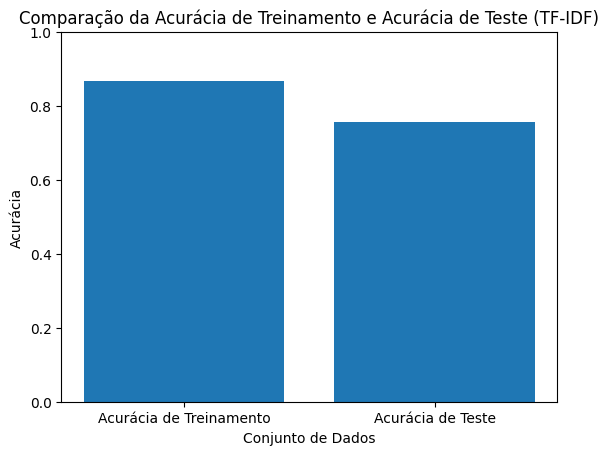

In [38]:
import matplotlib.pyplot as plt

# Valores de acurácia
acuracia_treinamento = pipeline.score(X_train, y_train)
acuracia_teste = accuracy

# Criando o gráfico
plt.bar(['Acurácia de Treinamento', 'Acurácia de Teste'], [acuracia_treinamento, acuracia_teste])
plt.xlabel('Conjunto de Dados')
plt.ylabel('Acurácia')
plt.title('Comparação da Acurácia de Treinamento e Acurácia de Teste (TF-IDF)')
plt.ylim(0, 1)  # Definindo os limites do eixo y de 0 a 1
plt.show()


Os resultados obtidos indicam claramente que o modelo está apresentando um desempenho inferior no conjunto de teste em comparação ao conjunto de treinamento. 